# 멕시코풍 프랜차이즈 chipotle 주문 데이터 분석

[데이터 셋 다운로드](https://drive.google.com/drive/folders/1vgh_YlGJhttIR-4_39VvBq5YEtJFDSBq?usp=sharing)

## 데이터 불러오기

pandas 라이브러리를 활용해 데이터를 읽어 오자.

```pd.read_csv(file_path, sep=, encoding=)```이런 형태 2번 3번 변수는 생략 가능함

<p>

>sep의 경우 구분자를 의미
>encoding은 글자 깨짐 방지 같은 역할임 한글의 경우 cp949를 대부분 사용한다고 함

In [1]:
import pandas as pd

file_path = "C:\\Users\\pwjdg\\바탕 화면\\Data-analysis\\data\\chipotle.tsv"

df_chipotle = pd.read_csv(file_path, sep='\t') # tap을 기준으로 나눠서 데이터 가져옴
print(df_chipotle.shape) # 행과 열의 수 반환
print(df_chipotle.info()) # 행의 구성, 열의 구성 정보를 나타냄(데이터 타입 같은 것.)
# 보면 order_id, quantity는 int64 , 나머지 3가지는 object타입임.(거의 문자열 의미)
# choice_description 항목은 총 데이터 4622개 중 3376의 데이터가 존재한다는 것이고 1246개의 결측 데이터가 존재 한다는 의미

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
df_chipotle

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
print(df_chipotle.columns)
print("==============================================")
print(df_chipotle.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


이제 데이터 셋의 피처의 의미는 파악 되었다.

- order_id : 주문 번호
- quantity : 아이템의 주문 수량
- item_name : 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격 정보


## 피처의 수치적 특징

quantity, item_price의 수치적 특징을 살펴보면 키, 몸무게 같은 어떤 구간의 모든 값을 데이터로 가질 수 있는 **연속형 피처**이다.

피처 형태의 종류

**수치형 피처**

명칭|특징|예시
-----|----|----|
연속형 피처|어떤 구간 안의 모든 값을 데이터로 가질 수 있다.|키 몸무게
비연속형 피처|셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 한다|나이


**범주형 피처**

명칭|특징|예시
-----|----|----|
순서가 있는 범주형 피처|순서가 있으나 수치는 아님.|학점(A,B,C,D...)
순서가 없는 범주형 피처|데이터가 구분되면서도 순서가 없음|혈액형

### 기초 통계량 파악

```dscribe()```를 통해서 기초 통계량 파악가능 (단, 수치형 피처 And 정수형)

In [4]:
df_chipotle['order_id'] = df_chipotle['order_id'].astype(str)
print(df_chipotle.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


위에 통계를 보고 알 수 있는 점은?

mean(평균)값이 1.075임 이걸 통해서 알 수 있는건?
~~한 사람이 같은 메뉴를 여러개 구매하는 경우는 많지 않다(?)~~

In [5]:
print(len(df_chipotle['order_id'].unique())) # order_id의 개수를 출력
print(len(df_chipotle['item_name'].unique()))

1834
50


## 탐색과 시각화

가장 많이 주문한 메뉴 Top 10을 분석해보자

```value_counts()```는 유일한 값별 개수를 반환함 기본 적으로 내림차순으로 반환(오름차순은 ascending=True)

```iteritmems()```는 딕셔너리로 부를 수 있는 함수임 키 값과 벨류 값의 리스트를 가져옴

```enumerate()```는 인덱스 번호, 값을 쌍으로 출력함

In [6]:
def value_count(df, colname, stop):
    '''
    가장 많이 주문한 아이템 TopN 출력하는 메서드
    :param df: 데이터 프레임
    :param colname: 컬럼명(피처)
    :param stop: n 번째
    :return: TopN 항목 출력
    '''

    item_count = df[colname].value_counts()[:stop] # 데이터 프레임의 colname 각 항목 갯수 stop까지 가져옴
    for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
        print(f"Top{idx} : {val} {cnt}")

In [7]:
value_count(df_chipotle, 'item_name', 10)

Top1 : Chicken Bowl 726
Top2 : Chicken Burrito 553
Top3 : Chips and Guacamole 479
Top4 : Steak Burrito 368
Top5 : Canned Soft Drink 301
Top6 : Steak Bowl 211
Top7 : Chips 211
Top8 : Bottled Water 162
Top9 : Chicken Soft Tacos 115
Top10 : Chips and Fresh Tomato Salsa 110


## 아이템별 주문 개수와 총량

```groupby()```는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연산을 적용할 수 있음

In [8]:
def item_group_count(df, groupname, colname, option, stop):
    '''
    아이템 그룹별 통계 구하기
    :param df: 데이터 프레임
    :param groupname: 그룹 기준
    :param colname: 컬럼명
    :param stop: N번째
    '''
    if option == 'count':
        item_group_counts = df.groupby(groupname)[colname].count()
        print(item_group_counts[:stop])
        return item_group_counts
    elif option == "sum":
        item_group_counts = df.groupby(groupname)[colname].sum()
        print(item_group_counts[:stop])
        return item_group_counts

In [9]:
order_count = item_group_count(df_chipotle, 'item_name', 'order_id', "count", 10)
# 각 메뉴 기준으로 주문 개수

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64


In [10]:
item_quantity = item_group_count(df_chipotle, 'item_name', 'quantity', "sum", 10)
# 각 메뉴 기준으로 주문 총 량

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64


## 데이터 시각화 작업
대표적으로 시각화를 사용하는 라이브러리는 2가지 있음

2가지의 차이를 간단히 말하자면 seaborn은 matplotlib의 상위호환?? 그런 느낌으로 보면 됨

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def show_ordered_item():
    item_name_list = item_quantity.index.tolist()
    # tolist()는 시리얼 데이터프레임 -> 리스트로 변환? 하는 메서드(없어도 무방)
    x_pos = np.arange(len(item_name_list))
    # 0~50까지 숫자 생성
    order_cnt = item_quantity.values.tolist()

    plt.bar(x_pos, order_cnt, align='center')
    # x축(0~50 정수) y축 주문 총량
    plt.ylabel("ordered_item_count")
    plt.title("Distribution of all ordered item")
    plt.show()

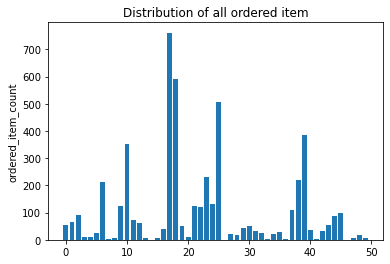

In [13]:
show_ordered_item()

# 데이터 전처리

item_price 같이 수치적 특징을 탐색하는 과정에서 $문자 때문에 통계를 구할 수 없었다.
따라서 이를 문자열이 아닌 숫자 타입으로 변환 해야하는데 이러한 과정을 전처리라 한다.

In [14]:
print(df_chipotle['item_price'].head())
# $표시 때문에 object 표현됨

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


## apply()와 lambda사용하기

$ 기호를 처리하는 방법은 여러가지 있겠지만 간편하게 하는 방법을 소개한다.

```apply()```는 각 행마다 연산을 적용시킴 (시리즈 단위 연산)

In [15]:
df_chipotle['item_price'] = df_chipotle['item_price'].apply(lambda x: float(x[1:]))
#float(x[1:])의 의미 문자열을 인덱스로 쪼개면 0번 인덱스는 $를 의미 따라서 1번 인덱스(즉, $ 바로 뒤 숫자)부터 실수로 변경하
df_chipotle.describe()
# 이전엔 quantity만 출력되었지만 이젠 item_price까지 출력됨을 볼 수 있음

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


# 탐색적 분석 (개념적 탐색)

In [16]:
df_chipotle.groupby('order_id')['item_price'].sum().mean()
# 1인당 얼마 만큼의 주문을 할까?

18.811428571428717

In [17]:
# 1 주문에 10달러 이상 지불한 주문 번호 출력
df_chipotle_group = df_chipotle.groupby('order_id').sum()
# order_id를 기준으로 그룹을 만들어서 합산결과를 출력한다.
# 이때 왜 quantity, item_price만 출력되냐면
# 앞에서 수치형 피처에 대해서 알아봤고 비수치형 피처는 합산 자체가 불가능하기 때문에 알아서 수치형 피처에 대해서만 출력한 것으로 판단됨

In [18]:
def id_output_ordered(money, df):
    '''
    특정 가격 이상 지불한 주문 번호 출력
    :param money: 기준 가격
    :param df: 데이터 프레임
    :return : 주문 번호
    '''
    result = df[df.item_price >= 10]
    return result

In [19]:
result = id_output_ordered(10, df_chipotle_group)
result

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [20]:
df_chipotle_one_item = df_chipotle[df_chipotle.quantity == 1]
price_per_item = df_chipotle_one_item.groupby('item_name').min()
price_per_item.sort_values(by = 'item_price', ascending = False)
# 우선 주문 건수가 1인 것을 추출함 (1번 라인)
# 아이템 이름을 기준으로 최소값을 뽑는다
# sort_values로 정렬
# sort_values(by = 기준, ascending = 이건 오름차순 내림차순 설정 False가 내림)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [21]:
def show_item_list(df):
    '''
    아이템 가격 분포 그래프 생성
    :param df: 데이터 프레임
    :return:
    '''
    item_list = df.index.tolist()
    x_pos = np.arange(len(item_list))
    item_price = df['item_price'].tolist()

    plt.bar(x_pos, item_price, align='center')
    plt.ylabel('item_price')
    plt.show()

    plt.hist(item_price)
    plt.ylabel('counts')
    plt.show()

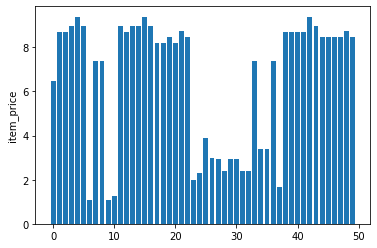

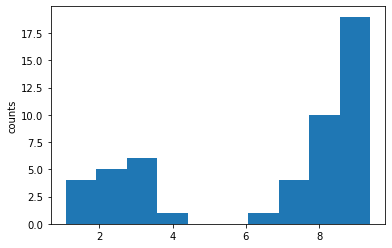

In [22]:
show_item_list(price_per_item)

In [23]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는가
df_chipotle.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)
# 총 몇 개 팔린지 봐야하니 sum()사용
# 그럼 가장 비싼 가격이 23번 팔린거 보임

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08


In [24]:
# 특정 아이템이 몇 번 주문되었는지 구하는 방법
def item_name_quantity_count(df, item_name):
    '''
    특정 아이템이 몇 번 주문되었는지 나타냄
    :param df: 데이터 프레임
    :param item_name: 아이템 이름
    :return:
    '''
    result = df[df['item_name'] == item_name] # df[df.item_name == item_name] 이랑 동일함
    result = result.drop_duplicates(['item_name','order_id'])
    print(f"{item_name} 주문 횟수 : {len(result)}")
    return result

**팁**
중복 데이터을 확인 및 중복 데이터 제거하는 법

데이터 분석에있어 의도하지 않은 중복 데이터는 매우 심각한 영향을 끼친다.
따라서 데이터 분석에 들어가기 전에 반드시 한번 해볼 필요가 있다.

- 중복 여부 확인 : **duplicated()**
- 중복 처리 : **drop_duplicated()**

In [25]:
result = item_name_quantity_count(df_chipotle, 'Salad')
result

Salad 주문 횟수 : 1


,order_id,quantity,item_name,choice_description,item_price
1414,575,1,Salad,"[Brown Rice, Adobo-Marinated and Grilled Chick...",7.4


In [26]:
def quantity_count(df, item_name, N):
    '''
    특정 아이템을 N개 이상 구매한 고객들의 총 주문 수량 출력
    :param df: 데이터 프레임
    :param item_name: 아이템 이름
    :param N : 구매 개수
    :return:
    '''
    df_item_name = df[df['item_name'] == item_name]
    df_item_name_order_sum = df_item_name.groupby('order_id').sum()['quantity']
    # df_item_name_order_sum = df_item_name_order_sum['quantity']
    # 11번 라인의 마지막 ['quantity'] 부분은 12번 라인과 같은 의미를 가짐
    result = df_item_name_order_sum[df_item_name_order_sum >= N]
    print(f"{item_name}의 {N}개 이상 고객들의 총 주문 수량은 {len(result)}")
    return result

In [27]:
result = quantity_count(df_chipotle, "Chicken Bowl", 2)
result.head()

Chicken Bowl의 2개 이상 고객들의 총 주문 수량은 114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

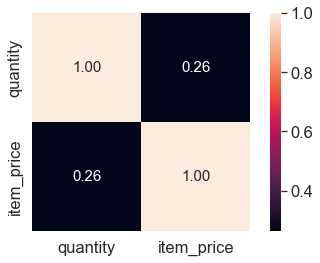

# 끝